**Import libraries and data**

In [8]:
#import libraries
#import numpy as np
from pyspark import SparkSession
from pyspark.sql.functions import col, count

ModuleNotFoundError: No module named 'pyspark'

In [9]:
#import data
# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Specify the path to the CSV file
file_path = "../input/us-accidents/US_Accidents_Dec20_Updated.csv"

# Read the CSV file into a DataFrame
accident_data = spark.read.csv(file_path, header=True, inferSchema=True)


NameError: name 'SparkSession' is not defined

# EDA

In [3]:
#look at dtype
accident_data.printSchema()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
accident_data.describe().show()

In [ ]:
#Sparks
for column in accident_data.columns:
    null_count = accident_data.where(col(column).isNull()).count()
    percentage = (null_count / accident_data.count()) * 100
    print('{}: {} ({}%)'.format(column, null_count, percentage))

In [4]:
#print number and percentage of null entries per variable
print('Null values per variable')
for column in accident_data.columns:
    print('{}: {} ({}%)'.format(column,pd.isnull(accident_data[column]).sum(),(pd.isnull(accident_data[column]).sum()/len(accident_data))*100))

Null values per variable
ID: 0 (0.0%)
Severity: 0 (0.0%)
Start_Time: 0 (0.0%)
End_Time: 0 (0.0%)
Start_Lat: 0 (0.0%)
Start_Lng: 0 (0.0%)
End_Lat: 282821 (9.730269970859522%)
End_Lng: 282821 (9.730269970859522%)
Distance(mi): 0 (0.0%)
Description: 0 (0.0%)
Number: 1891672 (65.08172751074277%)
Street: 0 (0.0%)
Side: 0 (0.0%)
City: 108 (0.0037156687687718683%)
County: 0 (0.0%)
State: 0 (0.0%)
Zipcode: 1114 (0.03832643526307279%)
Country: 0 (0.0%)
Timezone: 3430 (0.11800688774895841%)
Airport_Code: 6608 (0.2273438817041158%)
Weather_Timestamp: 46917 (1.6141484409673124%)
Temperature(F): 67224 (2.312797382517778%)
Wind_Chill(F): 1183859 (40.72988808268051%)
Humidity(%): 71270 (2.451997343984917%)
Pressure(in): 56908 (1.9578822064191619%)
Visibility(mi): 72078 (2.479796051069803%)
Wind_Direction: 63474 (2.183781105824311%)
Wind_Speed(mph): 307163 (10.567740426132161%)
Precipitation(in): 1301326 (44.771262742507595%)
Weather_Condition: 71851 (2.471986265787292%)
Amenity: 0 (0.0%)
Bump: 0 (0.0

In [5]:
#look at distribution of data
accident_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [6]:
#look at formatting of entries
accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
#looking to see ID format towards end
accident_data.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906609,A-2906610,2,2018-03-26 13:35:03,2018-03-26 14:39:00,38.831749,-104.748161,38.831749,-104.748161,0.000,Accident on Murray Blvd at Byron Dr.,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
#checking to see if the missing end lat/long are due having same start lat/long
accident_data[(accident_data.Start_Lat == accident_data.End_Lat) & (accident_data.Start_Lng == accident_data.End_Lng)]

#Spark
result = accident_data.filter((col("Start_Lat") == col("End_Lat")) & (col("Start_Lng") == col("End_Lng")))
#scritto
accident_data.query("(Start_Lat == End_Lat) & (Start_Lng == End_Lng)")

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,3,2018-10-17 16:40:36,2018-10-17 17:10:18,35.348240,-80.847221,35.348240,-80.847221,0.0,Three lanes blocked due to accident on I-77 No...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906604,A-2906605,2,2020-10-02 08:42:20,2020-10-02 10:27:03,26.392847,-80.095268,26.392847,-80.095268,0.0,Accident on I-95 Northbound near FL-794 Yamato...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.0,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.0,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.0,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [9]:
#check to see if missing values are in same rows
accident_data[np.logical_xor(accident_data.End_Lat.isna(),accident_data.End_Lng.isna()) == True]

#sparks
#~ significa not
result = accident_data.filter(
    ~((col("End_Lat").isNull() & col("End_Lng").isNull()) | (col("End_Lat").isNotNull() & col("End_Lng").isNotNull()))
)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [10]:
#look through some of the variables with low number of unique entries
#Side has ' '
#Wind direction has repeats with different spellings
#Weather condition has some repeats (e.g., 'heavy rain shower' and 'heavy rain showers')
for col in accident_data.columns:
    print('{}: {}'.format(col,accident_data[col].unique()))

ID: ['A-1' 'A-2' 'A-3' ... 'A-2906608' 'A-2906609' 'A-2906610']
Severity: [2 3 4 1]
Start_Time: ['2019-05-21 08:29:55' '2019-10-07 17:43:09' '2020-12-13 21:53:00' ...
 '2018-06-28 08:49:01' '2019-01-10 02:01:01' '2018-03-26 13:35:03']
End_Time: ['2019-05-21 09:29:40' '2019-10-07 19:42:50' '2020-12-13 22:44:00' ...
 '2020-11-24 00:47:37' '2019-12-29 23:38:00' '2018-03-26 14:39:00']
Start_Lat: [34.808868 35.09008  37.14573  ... 38.993397 34.06889  38.831749]
Start_Lng: [ -82.269157  -80.74556  -121.985052 ...  -77.02668   -95.399437
 -104.748161]
End_Lat: [34.808868 35.09008  37.16585  ... 30.419275 34.06889  38.831749]
End_Lng: [ -82.269157  -80.74556  -121.988062 ...  -95.399437 -117.34201
 -104.748161]
Distance(mi): [ 0.          1.4        14.153      ... 12.868      25.20000076
  7.743     ]
Description: ['Accident on Tanner Rd at Pennbrooke Ln.'
 'Accident on Houston Branch Rd at Providence Branch Ln.'
 'Stationary traffic on CA-17 from Summit Rd (CA-17) to Idylwild Rd (CA-17) due 

In [12]:
#create dataframe of variables collected at airport for airport_code with null values (i.e., no airport information)
weather_info = accident_data[accident_data.Airport_Code.isna()][['Airport_Code','Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]

In [13]:
#all records that are missing an airport_code are also missing weather information
print('Percentage null when Airport_Code is null:')
for weather in weather_info.columns:
    print('{}: {}%'.format(weather, (weather_info[weather].isna().count()/weather_info.Airport_Code.isna().count())*100))

Percentage null when Airport_Code is null:
Airport_Code: 100.0%
Weather_Timestamp: 100.0%
Temperature(F): 100.0%
Wind_Chill(F): 100.0%
Humidity(%): 100.0%
Pressure(in): 100.0%
Visibility(mi): 100.0%
Wind_Direction: 100.0%
Wind_Speed(mph): 100.0%
Precipitation(in): 100.0%
Weather_Condition: 100.0%


In [14]:
del weather_info
gc.collect()

88

In [15]:
#null percipitation values are not necessarily due to no rain
accident_data[accident_data['Precipitation(in)'] == 0]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,39.565780,-107.516950,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906599,A-2906600,2,2020-02-24 11:34:00,2020-02-24 13:29:12,33.888992,-118.188797,33.888992,-118.188797,0.000,At Alondra Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2906600,A-2906601,2,2019-07-25 15:55:24,2019-07-25 16:55:06,41.212261,-95.948593,41.212261,-95.948593,0.000,Accident on 25th St both ways at US-275 L St.,...,False,False,False,False,True,False,Day,Day,Day,Day
2906602,A-2906603,2,2020-10-31 03:49:00,2020-10-31 05:28:04,30.420856,-97.624067,30.419275,-97.620554,0.236,Incident on RENDOVA LN near TRINIDAD LN Drive ...,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [16]:
#looking for cases where Humidity is zero and Percipitation is null (i.e., precipitation should be set to zero)
accident_data[[a and b for a,b in zip(accident_data['Humidity(%)'] == 0,accident_data['Precipitation(in)'].isna())]][['Humidity(%)','Precipitation(in)']]

#Sparks
result = accident_data.filter((col("Humidity(%)") == 0) & col("Precipitation(in)").isNull()).select("Humidity(%)", "Precipitation(in)")

,Humidity(%),Precipitation(in)


In [17]:
#looking for cases where wind speed is zero and wind direction is null (i.e., no wind to have a wind direction)
accident_data[[a and b for a,b in zip(accident_data['Wind_Speed(mph)'] == 0,accident_data['Wind_Direction'].isna())]][['Wind_Speed(mph)','Wind_Direction']]

#spark uguale a sopra

,Wind_Speed(mph),Wind_Direction


In [18]:
#looking to see if wind_speed is zero, is wind_chill null
#for these records, null wind_chill entries should be replaced with temperature
accident_data[[a and b for a,b in zip(accident_data['Wind_Speed(mph)'] == 0,accident_data['Wind_Chill(F)'].isna())]][['Wind_Speed(mph)','Wind_Chill(F)']]


#spark uguale a sopra

,Wind_Speed(mph),Wind_Chill(F)
1047,0.0,NaN
1214,0.0,NaN
4608,0.0,NaN
7141,0.0,NaN
8420,0.0,NaN
...,...,...
2896583,0.0,NaN
2897577,0.0,NaN
2898261,0.0,NaN
2900158,0.0,NaN


In [19]:
#looking to see if wind_speed is zero if there is a wind chill
accident_data[[a and not b for a,b in zip(accident_data['Wind_Speed(mph)'] == 0,accident_data['Wind_Chill(F)'].isna())]][['Wind_Speed(mph)','Wind_Chill(F)']]

#spark uguale a sopra

,Wind_Speed(mph),Wind_Chill(F)
42,0.0,37.0
49,0.0,62.0
64,0.0,42.0
77,0.0,50.0
80,0.0,74.0
...,...,...
2906579,0.0,60.0
2906584,0.0,76.0
2906586,0.0,66.0
2906599,0.0,68.0


In [20]:
#looking for null values in both wind speed and wind chill
accident_data[[a and b for a,b in zip(accident_data['Wind_Speed(mph)'].isna(),accident_data['Wind_Chill(F)'].isna())]][['Wind_Speed(mph)','Wind_Chill(F)']]

#spark uguale a sopra

,Wind_Speed(mph),Wind_Chill(F)
34,NaN,NaN
43,NaN,NaN
46,NaN,NaN
71,NaN,NaN
72,NaN,NaN
...,...,...
2906572,NaN,NaN
2906583,NaN,NaN
2906593,NaN,NaN
2906594,NaN,NaN


In [21]:
#parse dates and times
import datetime
accident_data['datetime_start_parsed'] = pd.to_datetime(accident_data['Start_Time'], format="%Y-%m-%d %H:%M:%S")
accident_data['datetime_end_parsed'] = pd.to_datetime(accident_data['End_Time'], format="%Y-%m-%d %H:%M:%S")
accident_data['datetime_weathertime_parsed'] = pd.to_datetime(accident_data['Weather_Timestamp'], format="%Y-%m-%d %H:%M:%S")

In [22]:
#for reference when categorizing based on numerical and categorical
accident_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'datetime_start_parsed', 'datetime_end_parsed',
       'datetime_weathertime_parsed'],
      dtype='object')

In [23]:
#categorized variables based on numerical, categoric, and datetime
#description is excluded

numerical = [
       'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)','Number','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'
]

categorical = [
    'Severity','Street', 'Side', 'City', 'Zipcode', 'County', 'State','Country','Timezone','Airport_Code','Wind_Direction','Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'
]

datetime = [
        'datetime_start_parsed', 'datetime_end_parsed', 'datetime_weathertime_parsed'
]

In [24]:
#since dataset is over 1 GB, taking a sample of 1% of data for analysis
accident_sample = accident_data.sample(int(len(accident_data)/100))
print('Percentage of data sampled: {}%'.format((len(accident_sample)/len(accident_data))*100))

#ok in sparks sample è già implementato

Percentage of data sampled: 0.9999965595659549%


# GeoPandas Maps

In [41]:
#import geopandas and geoplot libraries
import geopandas
import geoplot as gplt
import geoplot.crs as gcrs

In [42]:
#create dataframe of variables I'm interested in looking at on a map plus lat/lng variables
severity_locations = accident_data[['Temperature(F)','Wind_Chill(F)','Severity','Start_Lng','Start_Lat']]

In [43]:
#create a GeoDataFrame
gdf_severity = geopandas.GeoDataFrame(
    severity_locations, geometry=geopandas.points_from_xy(severity_locations.Start_Lng, severity_locations.Start_Lat))

In [1]:
#generate map with hue based on severity
gdfs_sample = gdf_severity.sample(int(len(gdf_severity)/10))
print('{} accidents'.format(int(len(gdfs_sample))))

contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)
gplt.pointplot(gdfs_sample, ax=ax, hue=gdfs_sample.Severity, scale=gdfs_sample.Severity, legend=True, legend_var='hue')
plt.show()



#sparks
gdf_severity = spark.read.parquet("path/to/your/parquet/file")
geometry_column = "geometry"
severity_column = "Severity"

# Generate a sample DataFrame
gdfs_sample = gdf_severity.sample(withReplacement=False, fraction=0.1, seed=42)

# Assuming 'contiguous_usa' is a GeoJSON file
contiguous_usa_path = "path/to/contiguous_usa.geojson"

# Read GeoJSON file into a DataFrame
contiguous_usa = spark.read.json(contiguous_usa_path)

# Plotting
fig, ax = plt.subplots(figsize=(20, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the GeoDataFrame
contiguous_usa.toPandas().plot(ax=ax, color='white', edgecolor='black')

# Plot points from 'gdfs_sample' DataFrame
gdfs_sample.select(geometry_column, severity_column).toPandas().plot(
    ax=ax,
    markersize=gdfs_sample[severity_column].toPandas(),
    c=gdfs_sample[severity_column].toPandas(),
    cmap="viridis",
    legend=True,
    cax=cax,
)

plt.show()


NameError: name 'gdf_severity' is not defined

In [2]:
#generate map with hue based on temperature
gdfs_sample = gdf_severity.sample(int(len(gdf_severity)/10))
print('{} accidents'.format(int(len(gdfs_sample))))

contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)
gplt.pointplot(gdfs_sample, ax=ax, hue=gdfs_sample['Temperature(F)'],scale=gdfs_sample['Temperature(F)'], legend=True, legend_var='hue')
plt.show()

NameError: name 'gdf_severity' is not defined

In [3]:
#generate a map with hue based on wind chill
gdfs_sample = gdf_severity.sample(int(len(gdf_severity)/10))
print('{} accidents'.format(int(len(gdfs_sample))))

contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)
gplt.pointplot(gdfs_sample, ax=ax, hue=gdfs_sample['Wind_Chill(F)'],scale=gdfs_sample['Wind_Chill(F)'], legend=True, legend_var='hue')
plt.show()

NameError: name 'gdf_severity' is not defined

In [47]:
del gdf_severity
gc.collect()

12937

In [48]:
del gdfs_sample
gc.collect()

22

In [49]:
del contiguous_usa
gc.collect()

22

# Data Cleaning and Feature Engineering

In [50]:
#replace space with most common entry
accident_data.Side = accident_data.Side.replace(' ','R')

In [51]:
#view sorted Weather_Conditions to determine changes to be made
weather_condition = accident_data.Weather_Condition.unique().astype('str')
weather_condition.sort()
weather_condition

array(['Blowing Dust', 'Blowing Dust / Windy', 'Blowing Sand',
       'Blowing Snow', 'Blowing Snow / Windy', 'Clear', 'Cloudy',
       'Cloudy / Windy', 'Drifting Snow', 'Drizzle', 'Drizzle / Windy',
       'Drizzle and Fog', 'Dust Whirls', 'Fair', 'Fair / Windy', 'Fog',
       'Fog / Windy', 'Freezing Drizzle', 'Freezing Rain',
       'Freezing Rain / Windy', 'Funnel Cloud', 'Hail', 'Haze',
       'Haze / Windy', 'Heavy Blowing Snow', 'Heavy Drizzle',
       'Heavy Freezing Drizzle', 'Heavy Freezing Rain',
       'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain / Windy',
       'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet',
       'Heavy Smoke', 'Heavy Snow', 'Heavy Snow / Windy',
       'Heavy Snow with Thunder', 'Heavy T-Storm',
       'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Rain',
       'Heavy Thunderstorms and Snow',
       'Heavy Thunderstorms with Small Hail', 'Ice Pellets',
       'Light Blowing Snow', 'Light Drizzle', 'Light Drizzle / Windy',
       'Light

In [52]:
del weather_condition
gc.collect()

94

In [53]:
#make changes to Weather_Condition since some entries are similar
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Thunder','Thunderstorm')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('T-Storm','Thunderstorm')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('T-Storm / Windy','Thunderstorm / Windy')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Thunder / Windy','Thunderstorm / Windy')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Heavy Rain Shower','Heavy Rain')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Heavy Rain Showers','Heavy Rain')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Light Rain Shower','Light Rain')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Light Rain Showers','Light Rain')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Rain Shower','Rain')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Rain Showers','Rain')

In [54]:
#view unique values of Wind_Direction
accident_data.Wind_Direction.unique()

array(['N', 'VAR', 'W', 'SSW', 'SSE', 'NNW', 'NE', 'E', 'West', 'S',
       'Variable', 'WSW', 'SW', 'ESE', 'South', 'ENE', 'Calm', 'NNE',
       'CALM', 'NW', 'East', 'North', 'WNW', 'SE', nan], dtype=object)

In [55]:
#replace entries in Wind_Direction to be consistent with notation
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('West','W')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('Variable','VAR')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('South','S')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('Calm','CALM')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('East','E')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('North','N')

In [56]:
#make all zipcodes 5 digit                           
zipcodes = pd.DataFrame(accident_data[[not a for a in accident_data['Zipcode'].isna()]]['Zipcode'].str[:5])
zipindex = np.array(accident_data[accident_data.Zipcode.notnull()].index)
accident_data.loc[zipindex,'Zipcode'] = zipcodes.loc[:,'Zipcode']

In [57]:
#remove start/end/weather time (already parsed)  and remove Number which has 65% null values
accident_data = accident_data.drop(['ID','Start_Time','End_Time', 'Weather_Timestamp','Number'], axis=1)

In [58]:
#remove Number from numerical array
numerical.remove('Number')

In [59]:
#N/A Precipitation must mean virtually no rain
accident_data[accident_data.Weather_Condition == 'N/A Precipitation']['Precipitation(in)'].mean()

0.006653992395437255

In [60]:
#replace N/A Precipitation with NaN to be imputed with most frequent
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('N/A Precipitation', np.NaN)

In [61]:
#determine index then lat/lng for missing city, zipcode, and timezone data
citynullindex = np.array(accident_data[accident_data.City.isna()].index)
citynulllatlng = accident_data.loc[citynullindex, ['Start_Lat','Start_Lng']]

zipnullindex = np.array(accident_data[accident_data.Zipcode.isna()].index)
zipnulllatlng = accident_data.loc[zipnullindex, ['Start_Lat','Start_Lng']]

acnullindex = np.array(accident_data[accident_data.Airport_Code.isna()].index)

tznullindex = np.array(accident_data[accident_data.Timezone.isna()].index)
tznulllatlng = accident_data.loc[tznullindex, ['Start_Lat','Start_Lng']]

In [62]:
#initialize Nominatim for finding missing cities and zipcodes based on lat/lng
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [63]:
#fill in missing cities
for i in citynullindex:
    location = geolocator.reverse(citynulllatlng.loc[i,'Start_Lat'].astype('str')+","+citynulllatlng.loc[i,'Start_Lng'].astype('str'))
    address = location.raw['address']
    city = address.get('city', '')
    accident_data.loc[i,'City'] = city
    
#fill in missing zipcodes
for i in zipnullindex:
    location = geolocator.reverse(zipnulllatlng.loc[i,'Start_Lat'].astype('str')+","+zipnulllatlng.loc[i,'Start_Lng'].astype('str'))
    address = location.raw['address']
    zipcode = address.get('postcode')
    accident_data.loc[i,'Zipcode'] = zipcode
    #if cannot locate zipcode with geolocator, fill in zipcode mode for the state
    if zipcode == None:
        accident_data.loc[i,'Zipcode'] = accident_data[accident_data['State'] == accident_data.loc[i,'State']]['Zipcode'].mode(dropna=True)[0]

In [64]:
#replace missing airport_code data with most common airport_code for each state
ac_states = pd.DataFrame(accident_data.loc[acnullindex,'State'].unique(), columns=['State'])
for i in range(0,len(ac_states)):
    ac_states.loc[i,'Mode'] = accident_data[accident_data.State == ac_states.loc[i,'State']]['Airport_Code'].mode(dropna=True)[0]
for i in acnullindex:
    accident_data.loc[i,'Airport_Code'] = ac_states[ac_states['State'] == accident_data.loc[i,'State']]['Mode'].tolist()[0]

In [65]:
#install timezonefinder
!pip install timezonefinder

     |████████████████████████████████| 43.0 MB 18 kB/s  eta 0:00:01


In [66]:
#fill in missing time zones
from timezonefinder import TimezoneFinder
obj = TimezoneFinder()
for i in tznullindex:
    timezone = obj.timezone_at(lng=tznulllatlng.loc[i,'Start_Lng'], lat=tznulllatlng.loc[i,'Start_Lat'])
    accident_data.loc[i,'Timezone'] = timezone

In [67]:
#copy values from start lat/lng to end lat/lng for null values
latnull = np.array(accident_data[np.isnan(accident_data.End_Lat)].index)
accident_data.loc[latnull,'End_Lat'] = accident_data.loc[latnull,'Start_Lat']
lngnull = np.array(accident_data[np.isnan(accident_data.End_Lng)].index)
accident_data.loc[lngnull,'End_Lng'] = accident_data.loc[lngnull,'Start_Lng']

#replace missing wind chill data with temperature
wcnull = np.array(accident_data[np.isnan(accident_data['Wind_Chill(F)'])].index)
accident_data.loc[wcnull,'Wind_Chill(F)'] = accident_data.loc[i,'Temperature(F)']

#replace missing temperature data with wind chill
tempnull = np.array(accident_data[np.isnan(accident_data['Temperature(F)'])].index)
accident_data.loc[wcnull,'Temperature(F)'] = accident_data.loc[i,'Wind_Chill(F)']

#replace missing data for when the weather was collected based on end time of the accident
weathertimenull = np.array(accident_data[np.isnan(accident_data.datetime_weathertime_parsed)].index)
accident_data.loc[weathertimenull,'datetime_weathertime_parsed'] = accident_data.loc[weathertimenull,'datetime_end_parsed']

In [68]:
#variables to impute with median or mode strategy
median_impute = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
mode_impute = ['Wind_Direction','Weather_Condition','Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']

In [69]:
#mode impute (SimpleImputer for loop is too slow)
wdnull = np.array(accident_data[accident_data.Wind_Direction.isna()].index)
accident_data.loc[wdnull,'Wind_Direction'] = 'CALM'

wcnull = np.array(accident_data[accident_data.Weather_Condition.isna()].index)
accident_data.loc[wcnull,'Weather_Condition'] = 'Fair'

ssnull = np.array(accident_data[accident_data.Sunrise_Sunset.isna()].index)
accident_data.loc[ssnull,'Sunrise_Sunset'] = 'Day'

ctnull = np.array(accident_data[accident_data.Civil_Twilight.isna()].index)
accident_data.loc[ssnull,'Civil_Twilight'] = 'Day'

ntnull = np.array(accident_data[accident_data.Nautical_Twilight.isna()].index)
accident_data.loc[ssnull,'Nautical_Twilight'] = 'Day'

atnull = np.array(accident_data[accident_data.Astronomical_Twilight.isna()].index)
accident_data.loc[atnull,'Astronomical_Twilight'] = 'Day'

In [70]:
#impute variables with median values
import numpy as np
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
accident_data_median_fit = imputer1.fit_transform(accident_data[median_impute])
accident_data_median = imputer1.transform(accident_data_median_fit)

accident_data[median_impute] = pd.DataFrame(accident_data_median)

In [71]:
#print number and percentage of null entries per variable
print('Null values per variable')
for column in accident_data.columns:
    print('{}: {} ({}%)'.format(column,pd.isnull(accident_data[column]).sum(),(pd.isnull(accident_data[column]).sum()/len(accident_data))*100))

Null values per variable
Severity: 0 (0.0%)
Start_Lat: 0 (0.0%)
Start_Lng: 0 (0.0%)
End_Lat: 0 (0.0%)
End_Lng: 0 (0.0%)
Distance(mi): 0 (0.0%)
Description: 0 (0.0%)
Street: 0 (0.0%)
Side: 0 (0.0%)
City: 0 (0.0%)
County: 0 (0.0%)
State: 0 (0.0%)
Zipcode: 0 (0.0%)
Country: 0 (0.0%)
Timezone: 0 (0.0%)
Airport_Code: 0 (0.0%)
Temperature(F): 0 (0.0%)
Wind_Chill(F): 0 (0.0%)
Humidity(%): 0 (0.0%)
Pressure(in): 0 (0.0%)
Visibility(mi): 0 (0.0%)
Wind_Direction: 0 (0.0%)
Wind_Speed(mph): 0 (0.0%)
Precipitation(in): 0 (0.0%)
Weather_Condition: 0 (0.0%)
Amenity: 0 (0.0%)
Bump: 0 (0.0%)
Crossing: 0 (0.0%)
Give_Way: 0 (0.0%)
Junction: 0 (0.0%)
No_Exit: 0 (0.0%)
Railway: 0 (0.0%)
Roundabout: 0 (0.0%)
Station: 0 (0.0%)
Stop: 0 (0.0%)
Traffic_Calming: 0 (0.0%)
Traffic_Signal: 0 (0.0%)
Turning_Loop: 0 (0.0%)
Sunrise_Sunset: 0 (0.0%)
Civil_Twilight: 0 (0.0%)
Nautical_Twilight: 0 (0.0%)
Astronomical_Twilight: 0 (0.0%)
datetime_start_parsed: 0 (0.0%)
datetime_end_parsed: 0 (0.0%)
datetime_weathertime_pars

In [72]:
#seperate variables with dates and times into seperate columns
for col in datetime:
    accident_data['{} day'.format(col)] = accident_data[col].dt.day
    accident_data['{} month'.format(col)] = accident_data[col].dt.month
    accident_data['{} year'.format(col)] = accident_data[col].dt.year
    accident_data['{} hour'.format(col)] = accident_data[col].dt.hour
    accident_data['{} minute'.format(col)] = accident_data[col].dt.minute
    accident_data['{} second'.format(col)] = accident_data[col].dt.second
    numerical.append('{} day'.format(col))
    numerical.append('{} month'.format(col))
    numerical.append('{} year'.format(col))
    numerical.append('{} hour'.format(col))
    numerical.append('{} minute'.format(col))
    numerical.append('{} second'.format(col))

#remove datetime columns from dataframe     
accident_data = accident_data.drop(datetime, axis=1)

# PCA

In [73]:
#sample dataframe
accident_sample = accident_data[numerical].sample(int(len(accident_data)/100))

In [74]:
#standardize sample
accident_data_for_PCA_standardized = (accident_sample - accident_sample.mean(axis=0)) / accident_sample.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA(6)
accident_data_pca = pca.fit_transform(accident_data_for_PCA_standardized)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(accident_data_pca.shape[1])]
accident_data_pca = pd.DataFrame(accident_data_pca, columns=component_names)

accident_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.612504,0.606453,1.717913,3.360612,-1.420401,-0.091554
1,-2.205223,-0.225737,-0.781732,-2.157043,-0.090005,-1.541323
2,-2.372198,-0.716063,-0.774909,-2.052509,0.686821,-1.406275
3,-1.556224,0.818590,-0.570898,-1.908849,1.829475,2.812447
4,1.566992,-1.529888,-2.234553,0.824751,0.854049,1.030045


In [75]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=numerical,  # and the rows are the original features
)
loadings

#PC1: year
#PC2: hour
#PC3: month
#PC4: day
#PC5: latitude
#PC6: longitude

,PC1,PC2,PC3,PC4,PC5,PC6
Start_Lat,0.147393,0.180060,0.218538,0.031658,0.416951,0.024390
Start_Lng,0.089483,0.107984,-0.051580,-0.013517,-0.227363,0.592777
End_Lat,0.147385,0.180054,0.218536,0.031636,0.416971,0.024401
End_Lng,0.089476,0.107979,-0.051590,-0.013519,-0.227368,0.592763
Distance(mi),-0.009929,0.051371,0.014303,0.011756,0.053413,0.090776
Temperature(F),-0.238982,-0.306205,-0.179817,-0.050855,-0.203875,-0.062588
Wind_Chill(F),-0.233774,-0.300768,-0.189267,-0.050793,-0.208612,-0.080794
Humidity(%),0.062117,0.281602,0.073027,0.061260,-0.157517,0.107351
Pressure(in),0.186026,0.002422,-0.123628,-0.054313,-0.178825,0.057366
Visibility(mi),-0.037986,-0.142706,-0.100608,-0.036145,0.028021,-0.052912


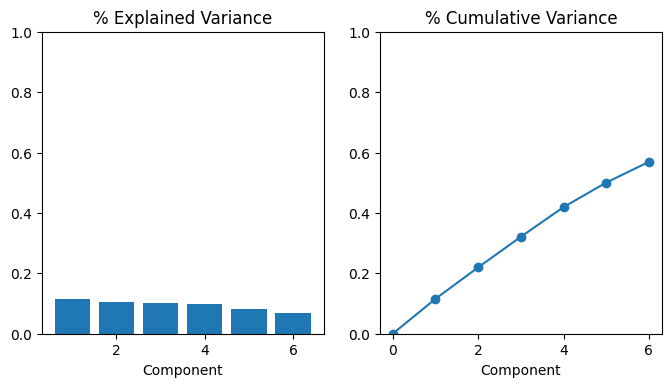

In [76]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

# Feature Engineering

In [77]:
#create variables for the change in lat and lng for each accident
accident_data['abs_lng_change'] = abs(accident_data.End_Lng - accident_data.Start_Lng)
accident_data['abs_lat_change'] = abs(accident_data.End_Lat - accident_data.Start_Lat)

#add new variables to numerical variables list
numerical.append('abs_lng_change')
numerical.append('abs_lat_change')